# MJO-TC genesis analysis
Update based on Eric's comments on paper 1

2025.4.11

Mu-Ting Chien

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cartopy.util as cartopy_util
import cartopy.crs as ccrs
import xarray as xr
from matplotlib.patches import Rectangle # Use to mark boxes on map

In [30]:
DIR               = '/barnes-engr-scratch1/c832572266/'
file_dir_era5_eof = DIR + 'data_output/ace2/obs_compare_with_ace2/MJO/'
file_dir_ace2     = DIR + 'data_output/ace2/ace2_output/10yr/'
file_dir_out      = file_dir_era5_eof
fig_dir           = DIR + 'figure/paper1_fig/test/'
os.makedirs(fig_dir, exist_ok=True)

In [31]:
narrow_wide = 0 #0 or 1 (0 is better for paper)

# Load basin info
basin_list      = list(['NI','NWPAC','NEPAC','NATL','SI','SPAC'])
basin_long_list = list(['North IO','North WestPac','North EastPac','North Atl','South IO','South Pac'])
if narrow_wide == 0:
    #############
    # New lon, lat (narrow domain)
    latmax_nh = 20
    latmax_sh = 25 #30 
    basin_lon_min = np.array([45, 130, 180, 265, 35, 150]) # updated only for MJO modulation of TC genesis
    basin_lon_max = np.array([105, 180, 265, 357.5, 135, 210])
    ##############
else:
    #####################
    # Original lon, lat (wide domain)
    latmax_nh = 30 
    latmax_sh = 30
    basin_lon_min = np.array([45, 105, 180, 265, 35, 135])
    basin_lon_max = np.array([105, 180, 265, 357.5, 135, 270])
    ##############

basin_lat_min = np.array([0,    0,    0,  0,  -latmax_sh, -latmax_sh])
basin_lat_max = np.array([latmax_nh,  latmax_nh, latmax_nh, latmax_nh,    0, 0])
nbasin        = np.size(basin_list)

In [43]:
season_list = list(['MJJASO','NDJFMA'])
nsea = np.size(season_list)
ibasin_min = np.array([1, 5])
basin_list_small = list([ basin_list[1], basin_list[5] ])
nphase = 8

In [44]:
model_list = list(['ACE2','ERA5'])
model_list2 = list(['ACE2','OBS'])

# Load TC genesis and TCGI, averaged over NWP(MJJASO) and SP(NDJFMA)

ACE2
(4, 2)


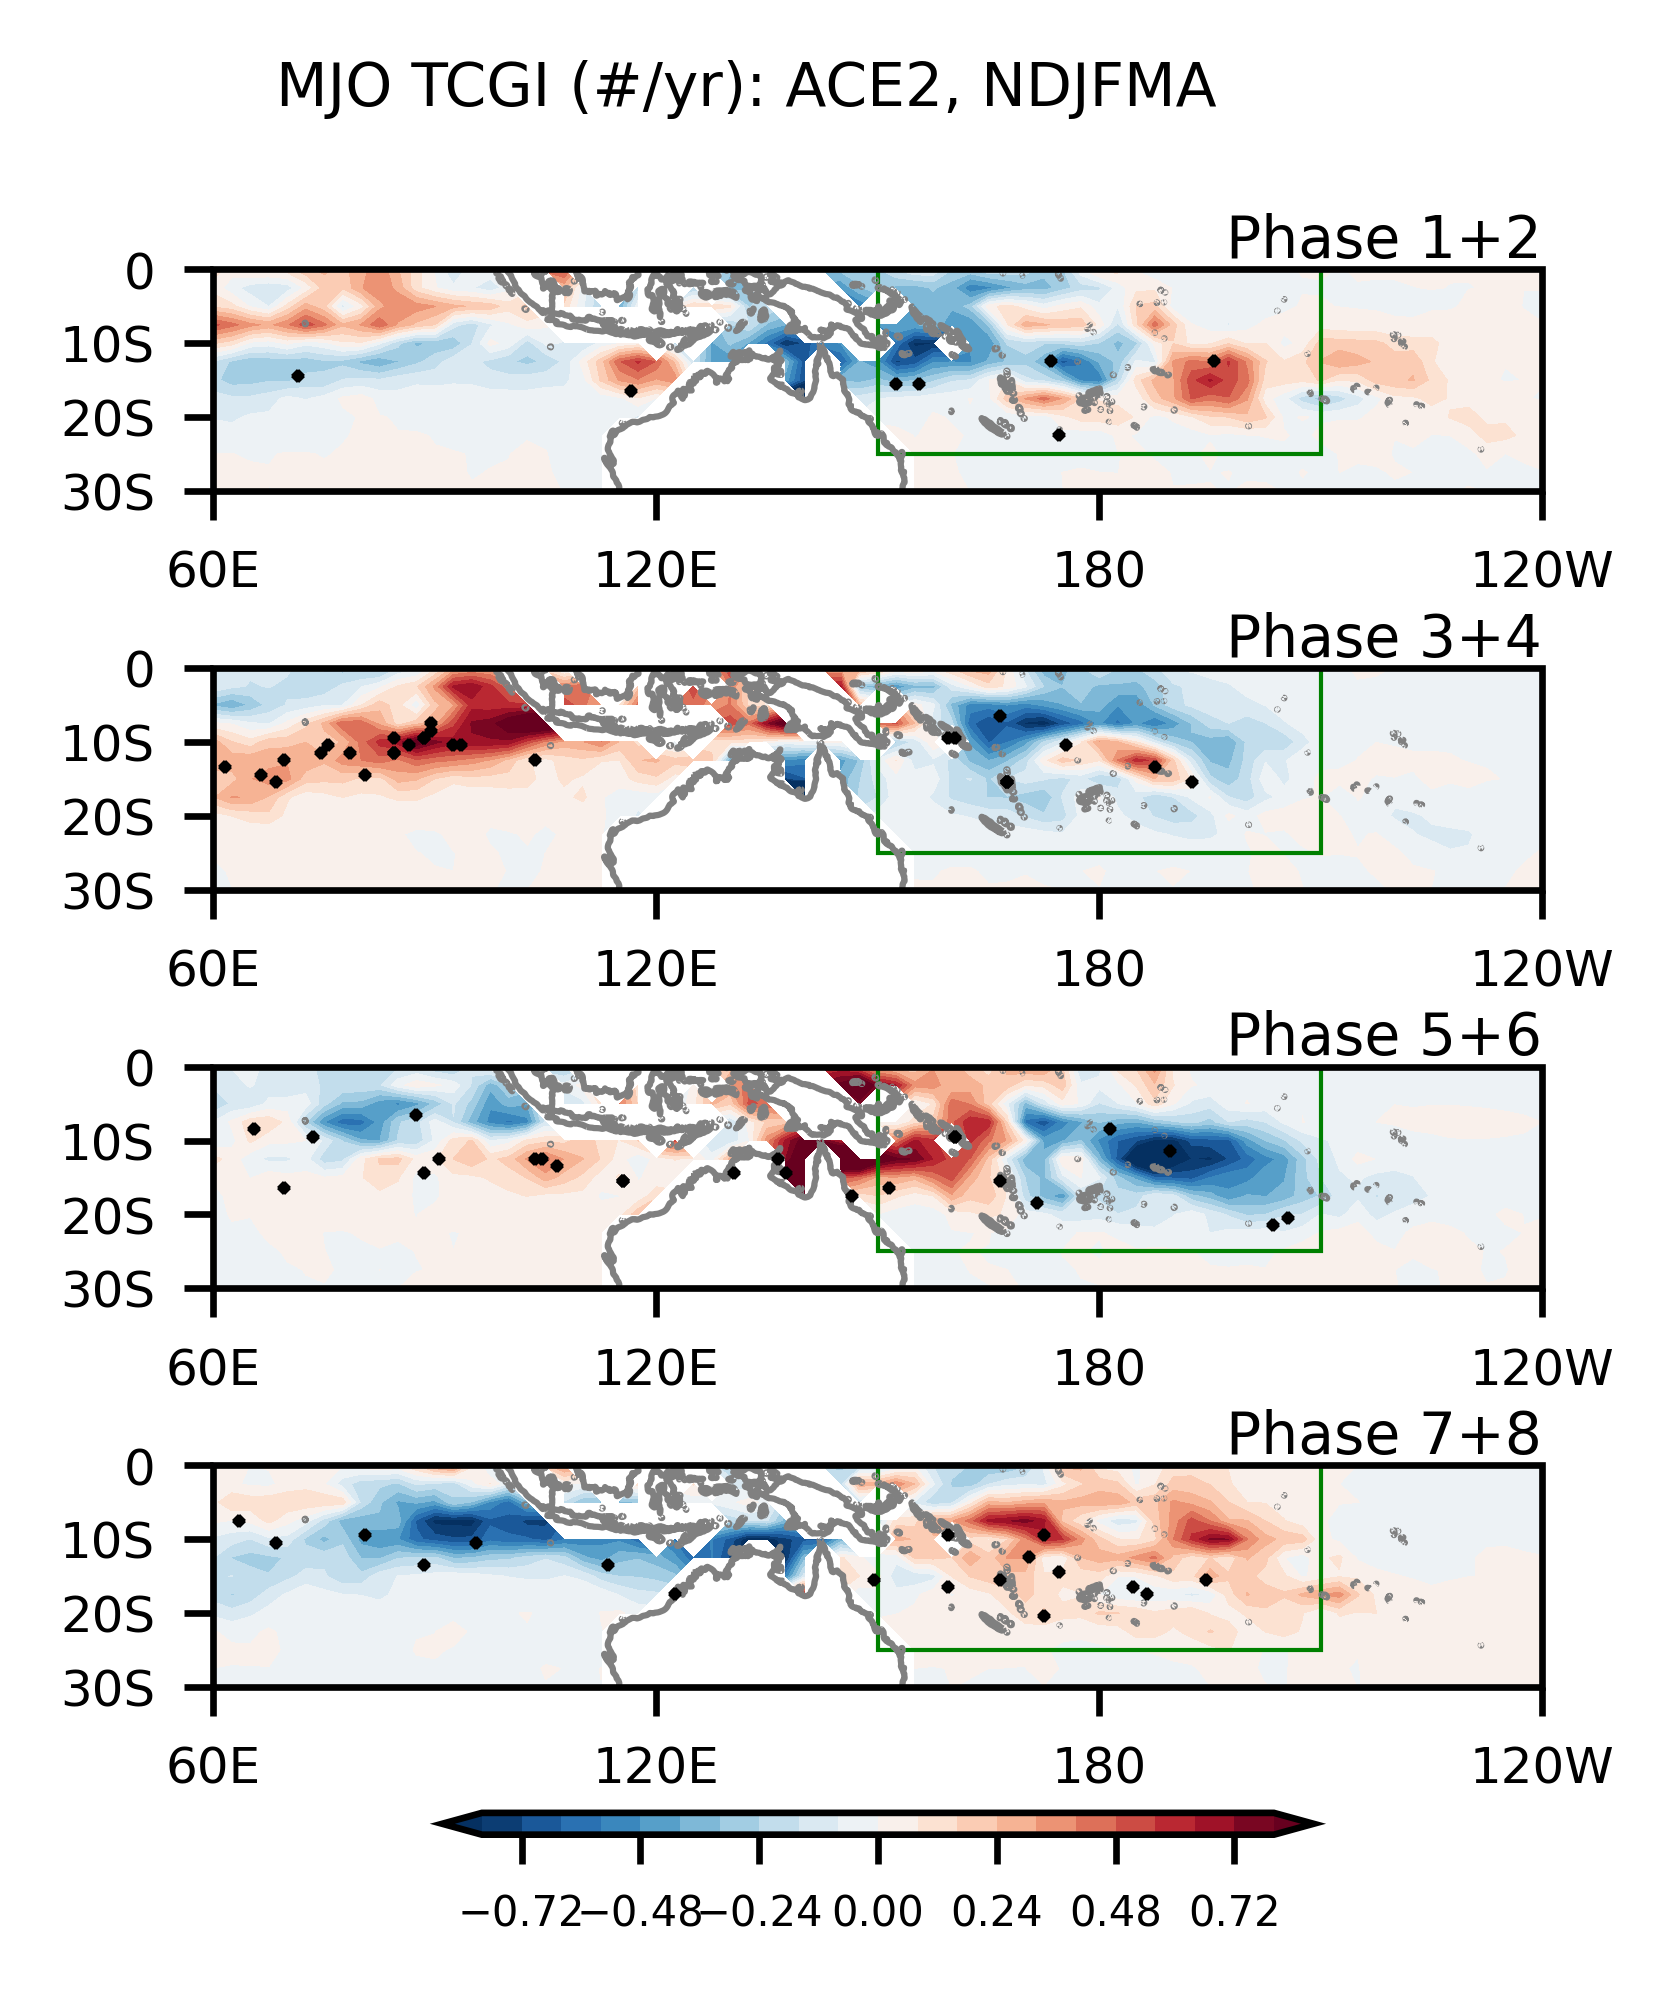

ERA5
(4, 2)


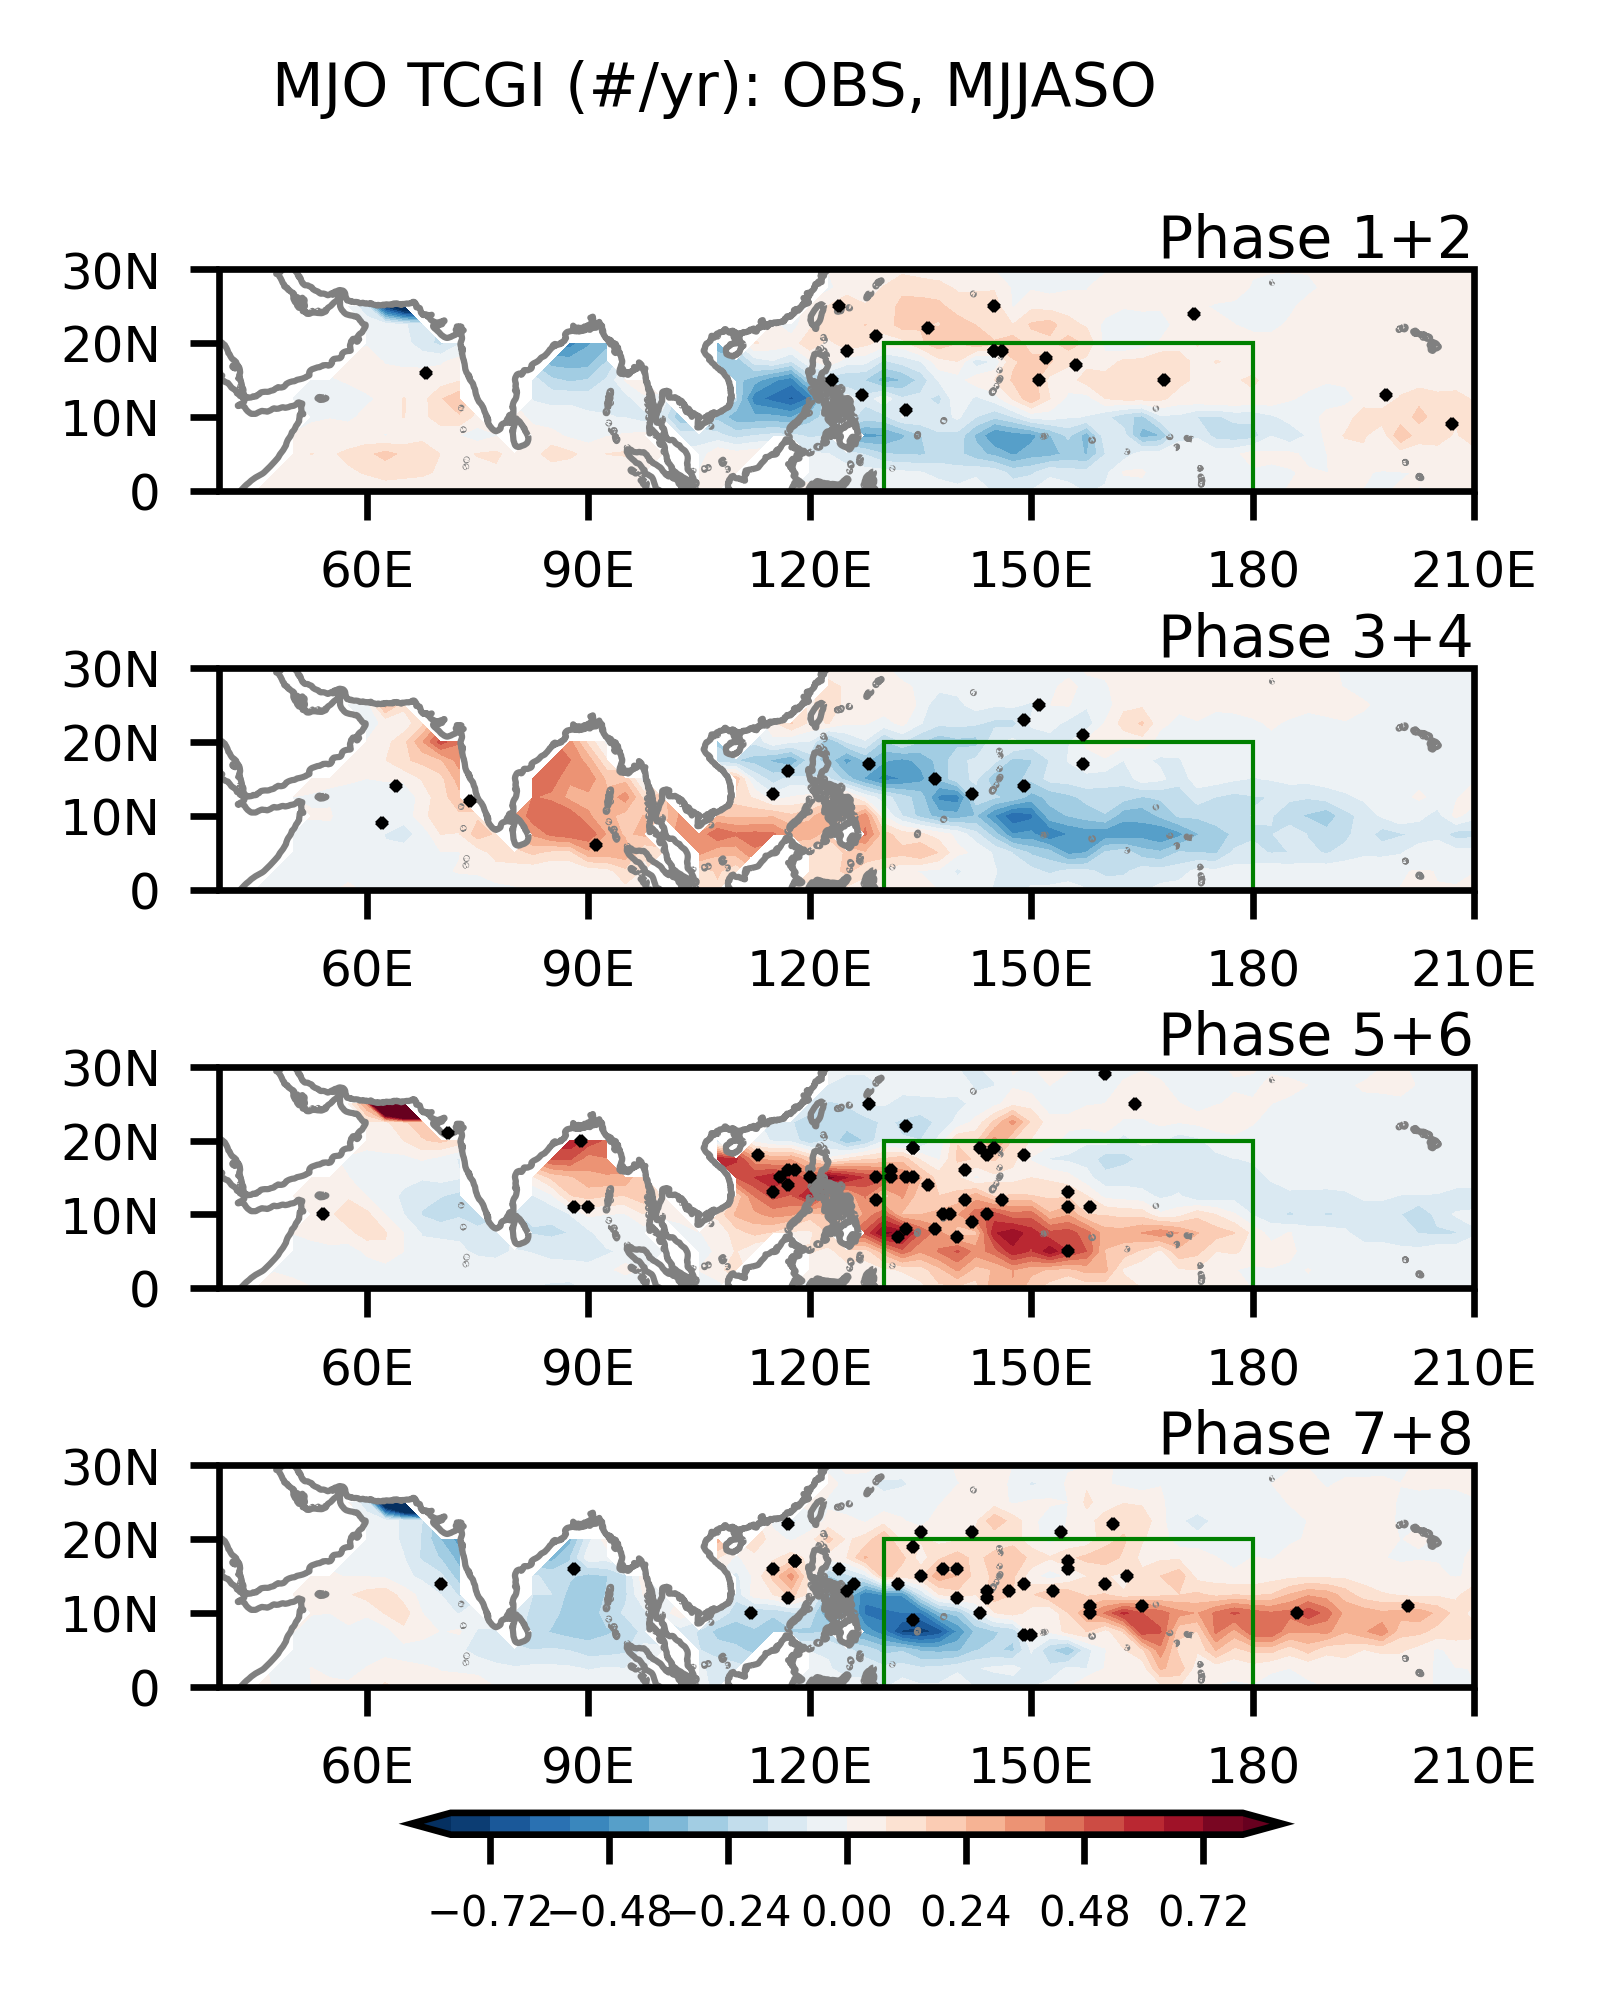

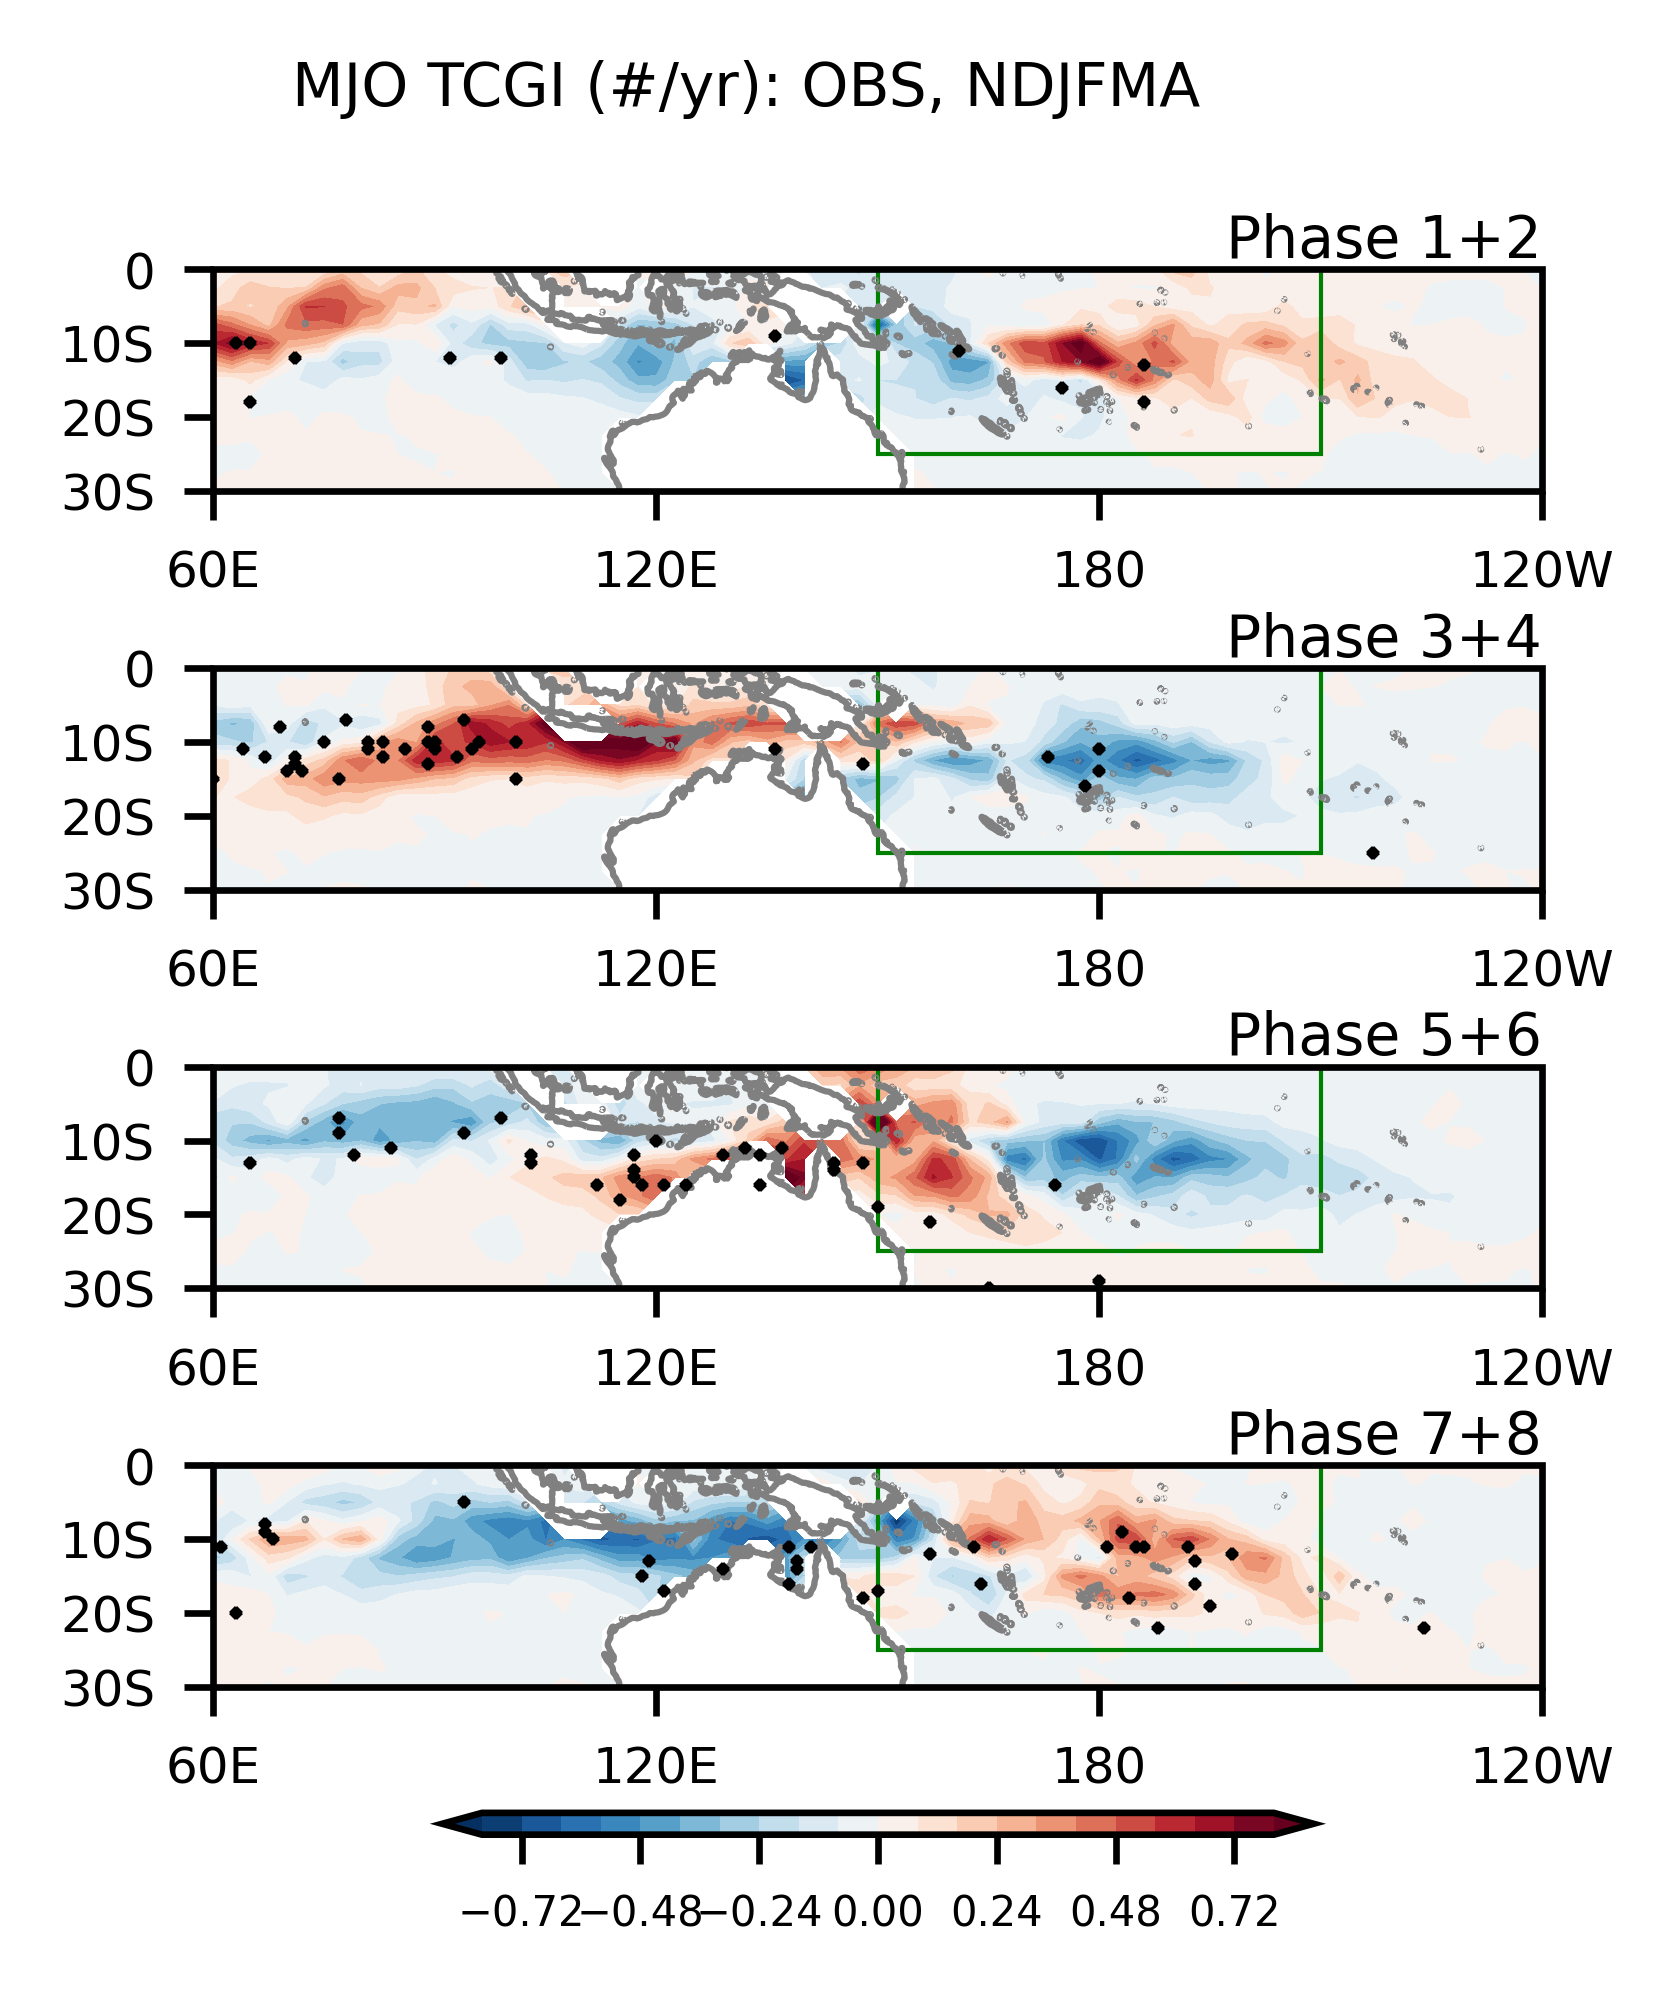

In [61]:
# Load TC genesis data for NH summer and SH summer separately
for im in range(0, 2):
    print(model_list[im])

    ################
    # Load TC genesis
    ################
    output2 = file_dir_out+'MJO_8ph_TCgenesis_location_'+model_list[im]+'_2001_2010_MJJASO.npz'
    data    = np.load(output2)
    lon_TC_phase1_MJJASO = data['lon_TC_phase1_MJJASO']
    lat_TC_phase1_MJJASO = data['lat_TC_phase1_MJJASO']
    lon_TC_phase2_MJJASO = data['lon_TC_phase2_MJJASO']
    lat_TC_phase2_MJJASO = data['lat_TC_phase2_MJJASO']
    lon_TC_phase3_MJJASO = data['lon_TC_phase3_MJJASO']
    lat_TC_phase3_MJJASO = data['lat_TC_phase3_MJJASO']
    lon_TC_phase4_MJJASO = data['lon_TC_phase4_MJJASO']
    lat_TC_phase4_MJJASO = data['lat_TC_phase4_MJJASO']
    lon_TC_phase5_MJJASO = data['lon_TC_phase5_MJJASO']
    lat_TC_phase5_MJJASO = data['lat_TC_phase5_MJJASO']
    lon_TC_phase6_MJJASO = data['lon_TC_phase6_MJJASO']
    lat_TC_phase6_MJJASO = data['lat_TC_phase6_MJJASO']
    lon_TC_phase7_MJJASO = data['lon_TC_phase7_MJJASO']
    lat_TC_phase7_MJJASO = data['lat_TC_phase7_MJJASO']
    lon_TC_phase8_MJJASO = data['lon_TC_phase8_MJJASO']
    lat_TC_phase8_MJJASO = data['lat_TC_phase8_MJJASO']
    #
    output2 = file_dir_out+'MJO_8ph_TCgenesis_location_'+model_list[im]+'_2001_2010_NDJFMA.npz'
    data    = np.load(output2)
    lon_TC_phase1_NDJFMA = data['lon_TC_phase1_NDJFMA']
    lat_TC_phase1_NDJFMA = data['lat_TC_phase1_NDJFMA']
    lon_TC_phase2_NDJFMA = data['lon_TC_phase2_NDJFMA']
    lat_TC_phase2_NDJFMA = data['lat_TC_phase2_NDJFMA']
    lon_TC_phase3_NDJFMA = data['lon_TC_phase3_NDJFMA']
    lat_TC_phase3_NDJFMA = data['lat_TC_phase3_NDJFMA']
    lon_TC_phase4_NDJFMA = data['lon_TC_phase4_NDJFMA']
    lat_TC_phase4_NDJFMA = data['lat_TC_phase4_NDJFMA']
    lon_TC_phase5_NDJFMA = data['lon_TC_phase5_NDJFMA']
    lat_TC_phase5_NDJFMA = data['lat_TC_phase5_NDJFMA']
    lon_TC_phase6_NDJFMA = data['lon_TC_phase6_NDJFMA']
    lat_TC_phase6_NDJFMA = data['lat_TC_phase6_NDJFMA']
    lon_TC_phase7_NDJFMA = data['lon_TC_phase7_NDJFMA']
    lat_TC_phase7_NDJFMA = data['lat_TC_phase7_NDJFMA']
    lon_TC_phase8_NDJFMA = data['lon_TC_phase8_NDJFMA']
    lat_TC_phase8_NDJFMA = data['lat_TC_phase8_NDJFMA']

    ################
    # Load TCGI
    ################
    # Load TCGI calculate for each MJO phase
    data = np.load(file_dir_out+'MJO_8ph_composite_TCGI_'+model_list[im]+'_2001_2010_summer.npz')
    TCGI_8ph_MJJASO = data['TCGI_8ph_MJJASO']
    TCGI_8ph_NDJFMA = data['TCGI_8ph_NDJFMA']
    lon_TCGI        = data['lon']
    lat_TCGI        = data['lat']
    n_MJJASO        = data['n_MJJASO']
    n_NDJFMA        = data['n_NDJFMA']

    ################
    # 1. TC genesis: Only select NWP and SP for narrow basin and only NDJFMA for SP, MJJASO for NWP
    ################
    TC_genesis_MJO_phase_basin = np.zeros([nphase, nsea]) # isea=0: NWP-MJJASO, isea=1: SP-NDJFMA

    for isea in range(0, 2):

        for iph in range(0, nphase):
            lon_tmp = globals()['lon_TC_phase'+str(iph+1)+'_'+season_list[isea]]
            lat_tmp = globals()['lat_TC_phase'+str(iph+1)+'_'+season_list[isea]]
            
            for i in range(0, np.size(lon_tmp)):
                for ibasin in range(ibasin_min[isea], ibasin_min[isea]+1):
                    dlonmin = lon_tmp[i]-basin_lon_min[ibasin]
                    dlonmax = lon_tmp[i]-basin_lon_max[ibasin]
                    dlatmin = lat_tmp[i]-basin_lat_min[ibasin]
                    dlatmax = lat_tmp[i]-basin_lat_max[ibasin]
                    #print(dlonmin, dlonmax, dlatmin, dlatmax)
                    if dlonmin*dlonmax < 0 and dlatmin*dlatmax <0:
                        TC_genesis_MJO_phase_basin[iph, isea] = TC_genesis_MJO_phase_basin[iph, isea] + 1
                        #print(ibasin)
                        continue

    # Save TC genesis number for 8 phases for each basin
    if narrow_wide == 0:
        output2 = file_dir_out+'TC_genesis_number_8phase_basin_'+model_list[im]+'_2001_2010_20SN_narrowbasin.npz'
    else:
        output2 = file_dir_out+'TC_genesis_number_8phase_basin_'+model_list[im]+'_2001_2010_30SN.npz'
    np.savez(output2, TC_genesis_MJO_phase_basin=TC_genesis_MJO_phase_basin, phase=np.arange(1,9), basin_list_small=basin_list_small, season_list=season_list)

    ################
    # 2. Calculate TCGI average
    ###################
    TCGI_ano_basin        = np.empty([nphase, nsea]) # isea=0: NWP-MJJASO, isea=1: SP-NDJFMA

    for isea in range(0, nsea):
        
        id = ibasin_min[isea]

        # Mark each basin
        ilatmin = np.argwhere(lat_TCGI==basin_lat_min[id]).squeeze()
        ilatmax = np.argwhere(lat_TCGI==basin_lat_max[id]).squeeze()
        ilonmin = np.argwhere(lon_TCGI==basin_lon_min[id]).squeeze()
        ilonmax = np.argwhere(lon_TCGI==basin_lon_max[id]).squeeze()
        #

        TCGI_tmp = globals()['TCGI_8ph_'+season_list[isea]]

        tmp = np.nansum(TCGI_tmp[:,ilatmin:ilatmax+1,ilonmin:ilonmax+1], 1)
        TCGI_ano_basin[:,isea] = np.nansum(tmp, 1)
    

    # Save data for MJO composite TCGI and TC genesis (line plot for each MJO phase)
    if narrow_wide == 0:
        output2 = file_dir_out+'MJO_8ph_composite_lineplot_TC_TCGI_'+model_list[im]+'_2001_2010_20SN_narrowbasin.npz'
    else:
        output2 = file_dir_out+'MJO_8ph_composite_lineplot_TC_TCGI_'+model_list[im]+'_2001_2010_30SN.npz'
    np.savez(output2, TCGI_ano_basin=TCGI_ano_basin, phase=np.arange(1,9), basin_list_small=basin_list_small, season_list=season_list)

    #######################
    # 3. Plot MJO modulation of TCGI and TC genesis (2 phases together)
    #######################################
    # Load lon
    ds     = xr.open_dataset(file_dir_ace2 + 'pr_ano_15SN_ace2_2001-2010_2.5deg.nc')
    lon    = ds['lon']
    nlon   = np.size(lon)
    #
    vname_long = list(['TCGI (#/yr)'])#precipitation (mm/day)','u850 (m/s)','u200 (m/s)'])
    vname = list(['TCGI'])#'pr','u850','u200'])
    cmap_list = list(['RdBu_r'])#,'RdBu_r','RdBu_r'])

    phase_4_list = list(['1+2','3+4','5+6','7+8'])
    phase_4_idx = np.array([[1,2],[3,4],[5,6],[7,8]])
    print(np.shape(phase_4_idx))

    TCGI_4ph_MJJASO = np.empty([4, np.size(lat_TCGI), nlon])

    TCGI_4ph_MJJASO[0, :, :] = TCGI_8ph_MJJASO[0,:,:] + TCGI_8ph_MJJASO[1,:,:]
    TCGI_4ph_MJJASO[1, :, :] = TCGI_8ph_MJJASO[2,:,:] + TCGI_8ph_MJJASO[3,:,:]
    TCGI_4ph_MJJASO[2, :, :] = TCGI_8ph_MJJASO[4,:,:] + TCGI_8ph_MJJASO[5,:,:]
    TCGI_4ph_MJJASO[3, :, :] = TCGI_8ph_MJJASO[6,:,:] + TCGI_8ph_MJJASO[7,:,:]
    #
    TCGI_4ph_NDJFMA = np.empty([4, np.size(lat_TCGI), nlon])
    TCGI_4ph_NDJFMA[0, :, :] = TCGI_8ph_NDJFMA[0,:,:] + TCGI_8ph_NDJFMA[1,:,:]
    TCGI_4ph_NDJFMA[1, :, :] = TCGI_8ph_NDJFMA[2,:,:] + TCGI_8ph_NDJFMA[3,:,:]
    TCGI_4ph_NDJFMA[2, :, :] = TCGI_8ph_NDJFMA[4,:,:] + TCGI_8ph_NDJFMA[5,:,:]
    TCGI_4ph_NDJFMA[3, :, :] = TCGI_8ph_NDJFMA[6,:,:] + TCGI_8ph_NDJFMA[7,:,:]

    font = 6 # 5 or 6
    for isea in range(0, 2):
        for v in range(0,1):#np.size(vname)):  
            v_in = globals()[vname[v]+'_4ph_'+season_list[isea]] 

            # Set Contour Level
            clev1 = np.arange(-4, 4.4, 0.4)*0.1*2 # TCGI
            cticks1 = np.array([-3.6, -2.4, -1.2, 0, 1.2, 2.4, 3.6])*0.1*2            

            clev = globals()['clev'+str(v+1)]
            cticks = globals()['cticks'+str(v+1)]

            fig_name = 'Fig.1_MJO_4phase_composite_'+vname[v]+season_list[isea]+'_WPfocus.png'       
                        
            #fig, axes = plt.subplots(4,1,figsize=(6.5, 3.5),dpi=600, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)} )
            fig, axes = plt.subplots(4,1,figsize=(5.5, 3.5),dpi=600, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)} )
            plt.subplots_adjust(left=0.1, right=0.98,top=0.9,bottom=0.15,hspace=0.8, wspace=0.1)
            #plt.rcParams.update({'font.size': 7})
            plt.rcParams.update({'font.size': 6})

            for iplt in range(0,4): # Each phase
                plt.subplot(4,1, iplt+1)
                ax = plt.gca()

                V_tmp = v_in[iplt,:,:]
                lon_tmp = lon
                lat_tmp = lat_TCGI

                #print(lon_tmp)
                [xx, yy] = np.meshgrid(lon_tmp, lat_tmp)        
                
                # Handle the data to prevent white line
                [V_tmp_cyclic, lon_cyclic] = cartopy_util.add_cyclic_point(
                    V_tmp.T, 
                    coord=lon_tmp,
                    axis=0
                )

                ax.coastlines(color='grey', linewidth=0.75)
                #######
                # Version 1: 60E to 60 W
                #plt.xlim([-60, 60])
                #ax.set_xticks(np.arange(60,360,60), crs=ccrs.PlateCarree())
                #ax.set_xticklabels(['60E', '120E', '180', '120W', '60W'], fontsize=font)
                ####################
                # Version 2: 0 to 60 W
                #ax.set_xticks(np.arange(0,360,60), crs=ccrs.PlateCarree())
                #ax.set_xticklabels(['0', '60E', '120E', '180', '120W', '60W'], fontsize=font)
                ###################           
                if isea == 0:
                    ax.set_yticks(np.arange(0,40,10), crs=ccrs.PlateCarree())
                    ax.set_yticklabels(['0','10N','20N','30N'], fontsize=6) 
                    plt.ylim([0, 30])
                    # Version 3: 60E to 20W
                    plt.xlim([-140, 30])
                    ax.set_xticks(np.arange(60,240,30), crs=ccrs.PlateCarree())
                    ax.set_xticklabels(['60E','90E', '120E','150E','180','210E'], fontsize=font)
                elif isea == 1:
                    ax.set_yticks(np.arange(-30,10,10), crs=ccrs.PlateCarree())
                    ax.set_yticklabels(['30S','20S','10S','0'], fontsize=6) 
                    plt.ylim([-30, 0])
                    # Version 3: 60E to 60W
                    plt.xlim([-120, 60])
                    ax.set_xticks(np.arange(60,300,60), crs=ccrs.PlateCarree())
                    ax.set_xticklabels(['60E','120E','180','120W'], fontsize=font)


                # Plot the TCGI data
                contour = plt.contourf(
                    lon_cyclic, lat_tmp, V_tmp_cyclic.T, cmap=cmap_list[v],
                    transform=ccrs.PlateCarree(), levels= clev, extend='both'
                )

                # Plot TC genesis location
                for iph in range(0, 2):
                    #print(phase_4_idx[iplt, iph])
                    lon_TC_tmp = globals()['lon_TC_phase'+str(phase_4_idx[iplt,iph])+'_'+season_list[isea]]
                    lat_TC_tmp = globals()['lat_TC_phase'+str(phase_4_idx[iplt,iph])+'_'+season_list[isea]]

                    lon_TC_adj = np.where(lon_TC_tmp>180, -360+lon_TC_tmp, lon_TC_tmp)
                    lon_TC_adj2 = np.where(lon_TC_adj>=0, lon_TC_adj-180, lon_TC_adj)
                    lon_TC_adj3 = np.where(lon_TC_adj<0, lon_TC_adj+180, lon_TC_adj2)
                    plt.plot(lon_TC_adj3, lat_TC_tmp, 'kx', markersize=1)
                
                # Plot basins
                plot_basin = 1
                if plot_basin == 1:

                    if isea == 0:
                        idx = 1
                    elif isea == 1:
                        idx = 5

                    width = basin_lon_max[idx] - basin_lon_min[idx]
                    height = basin_lat_max[idx] - basin_lat_min[idx]
                    rect = Rectangle((basin_lon_min[idx], basin_lat_min[idx]), width, height,
                                        edgecolor='g', facecolor='none', linewidth=0.5, transform=ccrs.PlateCarree())
                    ax.add_patch(rect)


                ax.set_title('Phase '+phase_4_list[iplt], pad=1,loc='right',fontsize=font+1)
            
            #plt.suptitle('MJO composite '+vname_long[v]+' (OBS)'+ ' '+season_list[isea], y=0.96)
            plt.suptitle('MJO '+vname_long[v]+': '+model_list2[im]+', '+season_list[isea], y=1)

            #cb = fig.colorbar(contour, ax=axes[:], orientation='horizontal',shrink=0.56, fraction=0.02, pad=0.08, aspect=40)           
            cb = fig.colorbar(contour, ax=axes[:], orientation='horizontal',shrink=0.3, fraction=0.02, pad=0.08, aspect=40)  
            cb.ax.tick_params(labelsize=5)
            cb.set_ticks(cticks)    
            plt.savefig(fig_dir+fig_name,format='png', dpi=600) # Change this to be fig_dir_ace2 if using ace data
            plt.show() 
            plt.close()


# Load average of TC genesis and TCGI

In [23]:
name_list = list(['20SN_narrowbasin','30SN'])

output2                         = file_dir_out+'TC_genesis_number_8phase_basin_'+model_list[0]+'_2001_2010_'+name_list[narrow_wide]+'.npz'
data                            = np.load(output2)
phase                           = data['phase']
basin_list_small                = data['basin_list_small']
season_list                     = data['season_list']
TC_genesis_MJO_phase_basin_ACE2 = data['TC_genesis_MJO_phase_basin']
#
output2                         = file_dir_out+'MJO_8ph_composite_lineplot_TC_TCGI_'+model_list[0]+'_2001_2010_'+name_list[narrow_wide]+'.npz'
data                            = np.load(output2)
TCGI_ano_basin_ACE2             = data['TCGI_ano_basin']
#
output2                         = file_dir_out+'TC_genesis_number_8phase_basin_'+model_list[1]+'_2001_2010_'+name_list[narrow_wide]+'.npz'
data                            = np.load(output2)
TC_genesis_MJO_phase_basin_OBS  = data['TC_genesis_MJO_phase_basin']
#
output2                         = file_dir_out+'MJO_8ph_composite_lineplot_TC_TCGI_'+model_list[1]+'_2001_2010_'+name_list[narrow_wide]+'.npz'
data                            = np.load(output2)
TCGI_ano_basin_OBS              = data['TCGI_ano_basin']

In [24]:
# Calculate anomaly for TC_genesis
TC_genesis_MJO_phase_basin_ano_ACE2 = TC_genesis_MJO_phase_basin_ACE2 - np.mean(TC_genesis_MJO_phase_basin_ACE2, 0)
TC_genesis_MJO_phase_basin_ano_OBS = TC_genesis_MJO_phase_basin_OBS - np.mean(TC_genesis_MJO_phase_basin_OBS, 0)

# Plot line plot for NWP and SP (TC genesis & TCGI together)

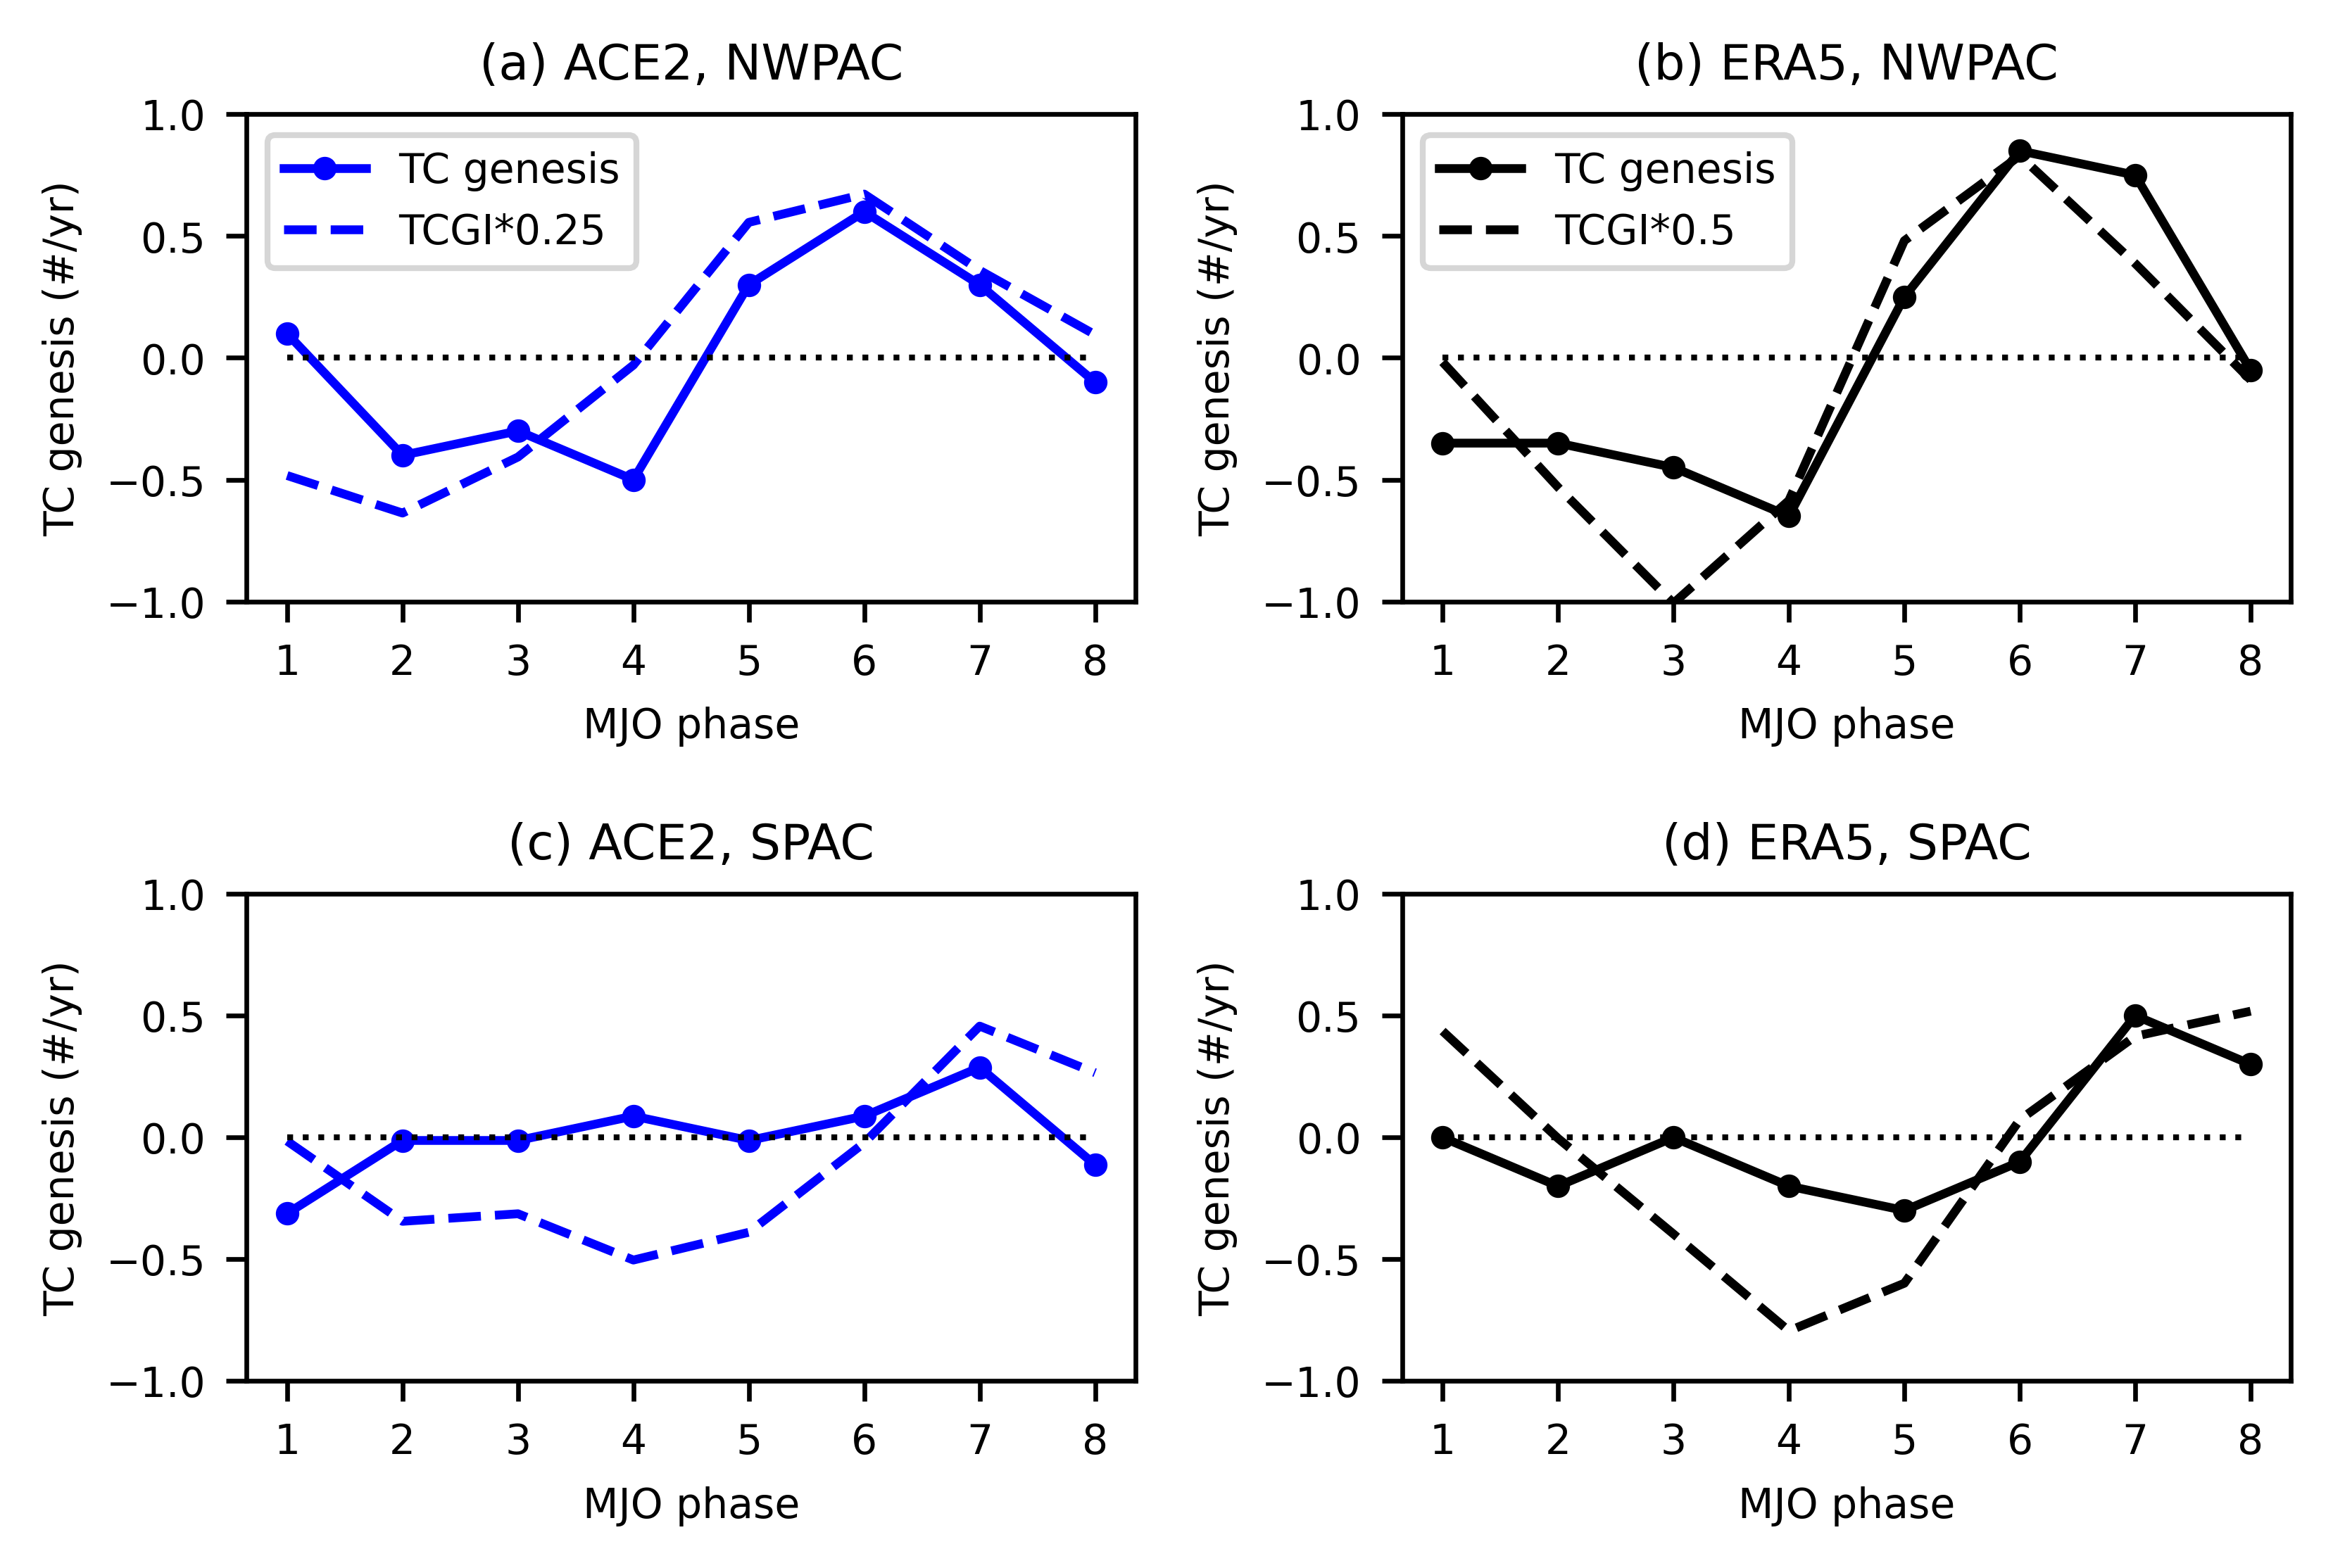

In [60]:
color_list = list(['b-o','k-o'])
color_list2 = list(['b--','k--'])
label_list = list(['(a)','(b)','(c)','(d)'])

fig_name = 'Fig.2_MJO_8phase_composite_TCgenesis_TCGI_lineplot_summer_TC_TCGI_'+name_list[narrow_wide]+'_notused.png'       
fig, axes = plt.subplots(2,2,figsize=(5.5, 4),dpi=600 )  
plt.subplots_adjust(left=0.1, right=0.98,top=0.9,bottom=0.15,hspace=0.6, wspace=0.3)
plt.rcParams.update({'font.size': 7})

for isea in range(0, 2):
    
    for im in range(0, 2):
        zeros = np.zeros([nphase])
        phase = np.arange(1,9)

        plt.subplot(2, 2, isea*2+im+1)

        TC_genesis_tmp = globals()['TC_genesis_MJO_phase_basin_ano_'+model_list2[im]]
        TCGI_tmp       = globals()['TCGI_ano_basin_'+model_list2[im]]

        plt.plot(phase, TC_genesis_tmp[:,isea]/10, color_list[im], markersize=3)
        #plt.plot(phase, TCGI_ano_basin[:,ibasin]/10, 'b--') # all season
        if im == 0:
            plt.plot(phase, TCGI_tmp[:,isea]/10*0.25, color_list2[im])
        else:
            plt.plot(phase, TCGI_tmp[:,isea]/10*0.5, color_list2[im])
        plt.plot(phase, zeros, 'k:', linewidth=1)
        plt.title(label_list[isea*2+im]+' '+model_list[im]+', '+basin_list_small[isea])
        plt.xticks(phase)
        #plt.ylim([-1.2,1.5])
        plt.ylim([-1,1])
        #plt.yticks(np.arange(-1,2,1))
        plt.yticks(np.arange(-1,1.5,0.5))
        plt.xlabel('MJO phase')
        if isea == 0 or isea == 1:
            plt.ylabel('TC genesis (#/yr)')
        if isea == 0:
            if im == 0:
                plt.legend(['TC genesis','TCGI*0.25'])
            elif im == 1:
                plt.legend(['TC genesis','TCGI*0.5'])
plt.savefig(fig_dir+fig_name,format='png', dpi=600)
plt.show()

# Plot line plot for NWP and SP (obs, ace2 together)

In [26]:
color_list = list(['b-o','k-o'])
color_list2 = list(['b--','k--'])
title = list(['TC genesis','TCGI*0.5'])
label_list = list(['(a)','(b)','(c)','(d)'])

fig_name = 'Fig.2_MJO_8phase_composite_TCgenesis_TCGI_lineplot_summer_'+name_list[narrow_wide]+'.png'     
fig, axes = plt.subplots(2,2,figsize=(5.5, 4),dpi=600 )  
plt.subplots_adjust(left=0.1, right=0.98,top=0.9,bottom=0.15,hspace=0.6, wspace=0.3)
plt.rcParams.update({'font.size': 7})
 
zeros = np.zeros([nphase])
phase = np.arange(1,9)

for iplt in range(0, 2):
    for isea in range(0, 2):
        plt.subplot(2, 2, isea+ iplt*2 + 1)

        TC_genesis_tmp_obs = globals()['TC_genesis_MJO_phase_basin_ano_'+model_list2[1]]
        TCGI_tmp_obs       = globals()['TCGI_ano_basin_'+model_list2[1]]
        #
        TC_genesis_tmp_ace2 = globals()['TC_genesis_MJO_phase_basin_ano_'+model_list2[0]]
        TCGI_tmp_ace2       = globals()['TCGI_ano_basin_'+model_list2[0]]
        

        if iplt == 0:
            plt.plot(phase, TC_genesis_tmp_ace2[:,isea]/10, color_list[0], markersize=3)
            plt.plot(phase, TC_genesis_tmp_obs[:,isea]/10, color_list[1], markersize=3)
        elif iplt == 1:
            plt.plot(phase, TCGI_tmp_ace2[:,isea]/10*0.5, color_list2[0])
            plt.plot(phase, TCGI_tmp_obs[:,isea]/10*0.5, color_list2[1])

        #plt.plot(phase, TCGI_ano_basin[:,ibasin]/10, 'b--') # all season

        plt.plot(phase, zeros, 'k:', linewidth=1)
        plt.title(label_list[isea+iplt*2]+' '+title[iplt]+', '+basin_list_small[isea])
        plt.xticks(phase)
        if isea == 0:
            plt.ylim([-1.25,1.5])
        else:
            plt.ylim([-1, 1])
        plt.yticks(np.arange(-1,2,1))
        plt.xlabel('MJO phase')
        if isea == 0 or isea == 1:
            plt.ylabel('TC genesis (#/yr)')
        if isea == 0:
            plt.legend(['ACE2','OBS'])

plt.savefig(fig_dir+fig_name,format='png', dpi=600)
plt.show()

# Plot MJO composite TCGI and TC genesis (map), start here!!!
Remember to mark the domain on the figure!!!

In [5]:
# Load lon
ds     = xr.open_dataset(file_dir_ace2 + 'pr_ano_15SN_ace2_2001-2010_2.5deg.nc')
#ds     = ds.isel(time=slice(0, -4))
#pr_ano = ds['pr_ano_2p5deg'][:, :, :] # make sure the time dimension is same as u
lon    = ds['lon']
nlon   = np.size(lon)
print(lon)

<xarray.DataArray 'lon' (lon: 144)> Size: 1kB
array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,  22.5,
        25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,  45. ,  47.5,
        50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,  67.5,  70. ,  72.5,
        75. ,  77.5,  80. ,  82.5,  85. ,  87.5,  90. ,  92.5,  95. ,  97.5,
       100. , 102.5, 105. , 107.5, 110. , 112.5, 115. , 117.5, 120. , 122.5,
       125. , 127.5, 130. , 132.5, 135. , 137.5, 140. , 142.5, 145. , 147.5,
       150. , 152.5, 155. , 157.5, 160. , 162.5, 165. , 167.5, 170. , 172.5,
       175. , 177.5, 180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5,
       200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 30

(4, 2)


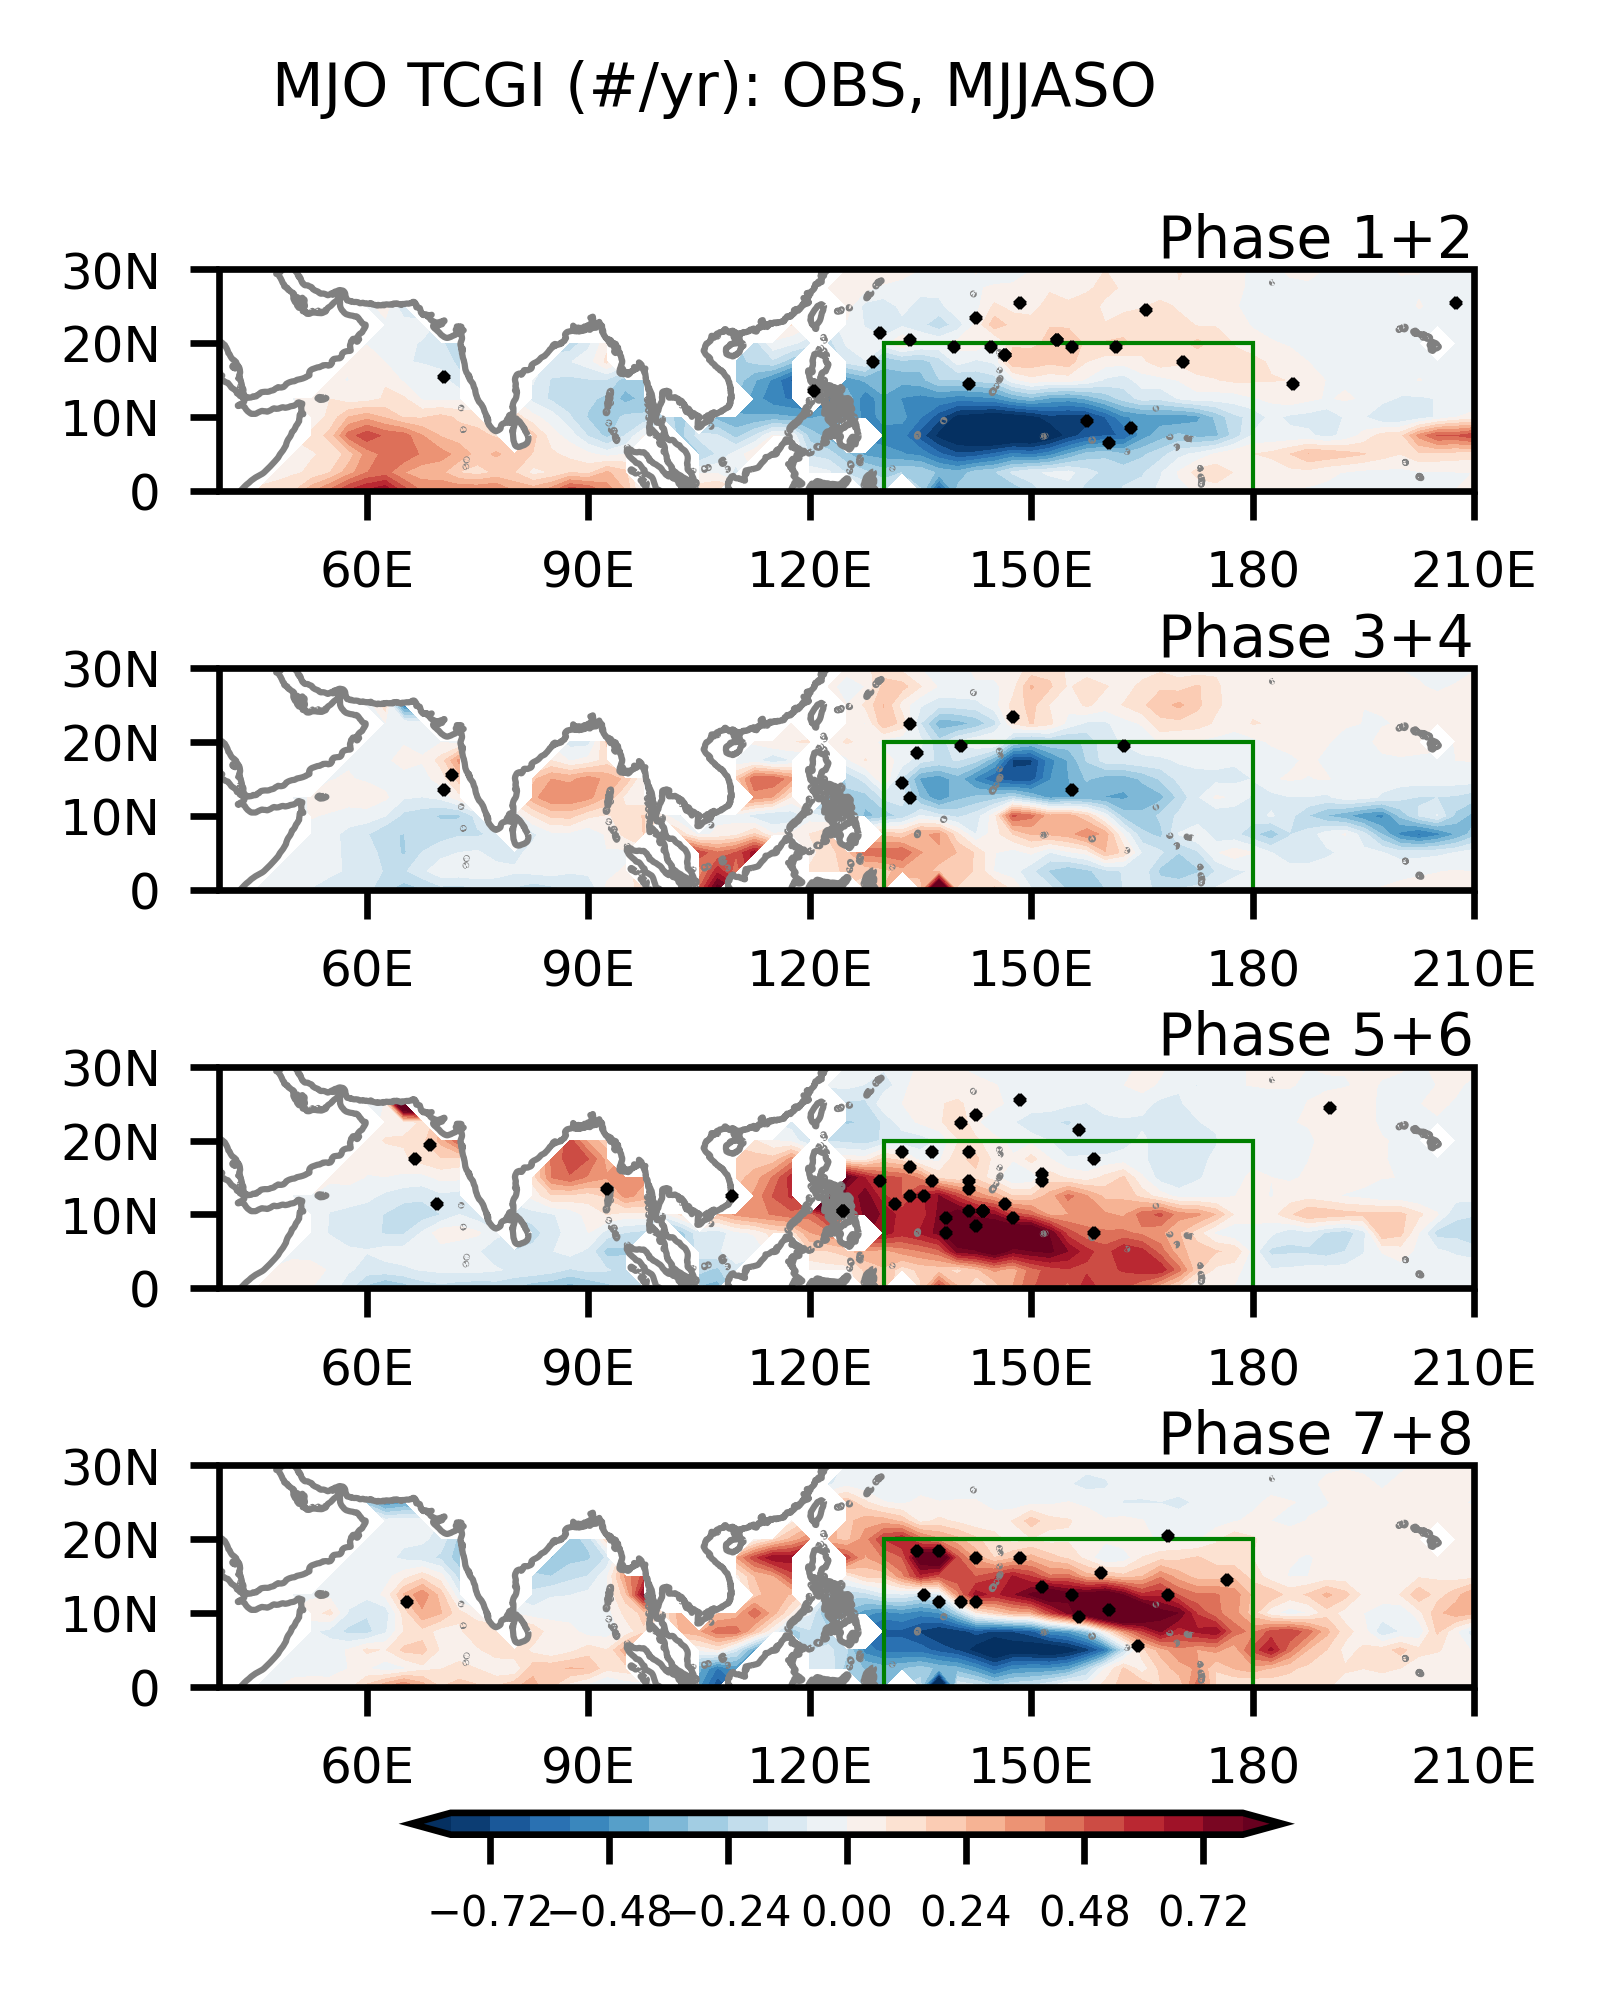

210.0
210.0
210.0
210.0


In [27]:
# Plot two phases together (8+1, 2+3, 4+5, 6+7)
vname_long = list(['TCGI (#/yr)'])#precipitation (mm/day)','u850 (m/s)','u200 (m/s)'])
vname = list(['TCGI'])#'pr','u850','u200'])
cmap_list = list(['RdBu_r'])#,'RdBu_r','RdBu_r'])

phase_4_list = list(['1+2','3+4','5+6','7+8'])
phase_4_idx = np.array([[1,2],[3,4],[5,6],[7,8]])
print(np.shape(phase_4_idx))

TCGI_4ph_MJJASO = np.empty([4, np.size(lat_TCGI), nlon])

TCGI_4ph_MJJASO[0, :, :] = TCGI_8ph_MJJASO[0,:,:] + TCGI_8ph_MJJASO[1,:,:]
TCGI_4ph_MJJASO[1, :, :] = TCGI_8ph_MJJASO[2,:,:] + TCGI_8ph_MJJASO[3,:,:]
TCGI_4ph_MJJASO[2, :, :] = TCGI_8ph_MJJASO[4,:,:] + TCGI_8ph_MJJASO[5,:,:]
TCGI_4ph_MJJASO[3, :, :] = TCGI_8ph_MJJASO[6,:,:] + TCGI_8ph_MJJASO[7,:,:]
#
TCGI_4ph_NDJFMA = np.empty([4, np.size(lat_TCGI), nlon])
TCGI_4ph_NDJFMA[0, :, :] = TCGI_8ph_NDJFMA[0,:,:] + TCGI_8ph_NDJFMA[1,:,:]
TCGI_4ph_NDJFMA[1, :, :] = TCGI_8ph_NDJFMA[2,:,:] + TCGI_8ph_NDJFMA[3,:,:]
TCGI_4ph_NDJFMA[2, :, :] = TCGI_8ph_NDJFMA[4,:,:] + TCGI_8ph_NDJFMA[5,:,:]
TCGI_4ph_NDJFMA[3, :, :] = TCGI_8ph_NDJFMA[6,:,:] + TCGI_8ph_NDJFMA[7,:,:]

font = 6 # 5 or 6
for isea in range(0, 2):
    for v in range(0,1):#np.size(vname)):  
        v_in = globals()[vname[v]+'_4ph'+season_list[isea]] 

        # Set Contour Level
        clev1 = np.arange(-4, 4.4, 0.4)*0.1*2 # TCGI
        cticks1 = np.array([-3.6, -2.4, -1.2, 0, 1.2, 2.4, 3.6])*0.1*2            

        clev = globals()['clev'+str(v+1)]
        cticks = globals()['cticks'+str(v+1)]

        fig_name = 'Fig.1_MJO_4phase_composite_'+vname[v]+season_list[isea]+'_WPfocus.png'       
                    
        #fig, axes = plt.subplots(4,1,figsize=(6.5, 3.5),dpi=600, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)} )
        fig, axes = plt.subplots(4,1,figsize=(5.5, 3.5),dpi=600, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)} )
        plt.subplots_adjust(left=0.1, right=0.98,top=0.9,bottom=0.15,hspace=0.8, wspace=0.1)
        #plt.rcParams.update({'font.size': 7})
        plt.rcParams.update({'font.size': 6})

        for iplt in range(0,4): # Each phase
            plt.subplot(4,1, iplt+1)
            ax = plt.gca()

            V_tmp = v_in[iplt,:,:]
            lon_tmp = lon
            lat_tmp = lat_TCGI

            #print(lon_tmp)
            [xx, yy] = np.meshgrid(lon_tmp, lat_tmp)        
            
            # Handle the data to prevent white line
            [V_tmp_cyclic, lon_cyclic] = cartopy_util.add_cyclic_point(
                V_tmp.T, 
                coord=lon_tmp,
                axis=0
            )

            ax.coastlines(color='grey', linewidth=0.75)
            #######
            # Version 1: 60E to 60 W
            #plt.xlim([-60, 60])
            #ax.set_xticks(np.arange(60,360,60), crs=ccrs.PlateCarree())
            #ax.set_xticklabels(['60E', '120E', '180', '120W', '60W'], fontsize=font)
            ####################
            # Version 2: 0 to 60 W
            #ax.set_xticks(np.arange(0,360,60), crs=ccrs.PlateCarree())
            #ax.set_xticklabels(['0', '60E', '120E', '180', '120W', '60W'], fontsize=font)
            ###################           
            if isea == 0:
                ax.set_yticks(np.arange(0,40,10), crs=ccrs.PlateCarree())
                ax.set_yticklabels(['0','10N','20N','30N'], fontsize=6) 
                plt.ylim([0, 30])
                # Version 3: 60E to 20W
                plt.xlim([-140, 30])
                ax.set_xticks(np.arange(60,240,30), crs=ccrs.PlateCarree())
                ax.set_xticklabels(['60E','90E', '120E','150E','180','210E'], fontsize=font)
            elif isea == 1:
                ax.set_yticks(np.arange(-30,10,10), crs=ccrs.PlateCarree())
                ax.set_yticklabels(['30S','20S','10S','0'], fontsize=6) 
                plt.ylim([-30, 0])
                # Version 3: 60E to 60W
                plt.xlim([-120, 60])
                ax.set_xticks(np.arange(60,300,60), crs=ccrs.PlateCarree())
                ax.set_xticklabels(['60E','120E','180','120W'], fontsize=font)


            # Plot the TCGI data
            contour = plt.contourf(
                lon_cyclic, lat_tmp, V_tmp_cyclic.T, cmap=cmap_list[v],
                transform=ccrs.PlateCarree(), levels= clev, extend='both'
            )

            # Plot TC genesis location
            for iph in range(0, 2):
                #print(phase_4_idx[iplt, iph])
                lon_TC_tmp = globals()['lon_TC_phase'+str(phase_4_idx[iplt,iph])+season_list[isea]]
                lat_TC_tmp = globals()['lat_TC_phase'+str(phase_4_idx[iplt,iph])+season_list[isea]]

                lon_TC_adj = np.where(lon_TC_tmp>180, -360+lon_TC_tmp, lon_TC_tmp)
                lon_TC_adj2 = np.where(lon_TC_adj>=0, lon_TC_adj-180, lon_TC_adj)
                lon_TC_adj3 = np.where(lon_TC_adj<0, lon_TC_adj+180, lon_TC_adj2)
                if isea == 0:
                    plt.plot(lon_TC_adj3, lat_TC_tmp, 'kx', markersize=0.4)
                else:
                    plt.plot(lon_TC_adj3, lat_TC_tmp, 'kx', markersize=1)
            
            # Plot basins
            plot_basin = 1
            if plot_basin == 1:

                if isea == 0:
                    idx = 1
                elif isea == 1:
                    idx = 5
                    print(basin_lon_max[idx])
                width = basin_lon_max[idx] - basin_lon_min[idx]
                height = basin_lat_max[idx] - basin_lat_min[idx]
                rect = Rectangle((basin_lon_min[idx], basin_lat_min[idx]), width, height,
                                    edgecolor='g', facecolor='none', linewidth=0.5, transform=ccrs.PlateCarree())
                ax.add_patch(rect)


            ax.set_title('Phase '+phase_4_list[iplt], pad=1,loc='right',fontsize=font+1)
        
        #plt.suptitle('MJO composite '+vname_long[v]+' (OBS)'+ ' '+season_list[isea], y=0.96)
        plt.suptitle('MJO '+vname_long[v]+': OBS, '+season_list[isea], y=1)

        #cb = fig.colorbar(contour, ax=axes[:], orientation='horizontal',shrink=0.56, fraction=0.02, pad=0.08, aspect=40)           
        cb = fig.colorbar(contour, ax=axes[:], orientation='horizontal',shrink=0.3, fraction=0.02, pad=0.08, aspect=40)  
        cb.ax.tick_params(labelsize=5)
        cb.set_ticks(cticks)    
        #plt.savefig(fig_dir+fig_name,format='png', dpi=600) # Change this to be fig_dir_ace2 if using ace data
        plt.show() 
        plt.close()